In [2]:
import pandas as pd
df = pd.read_csv('imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
print("각 열의 데이터 타입:")
print(df.dtypes)

각 열의 데이터 타입:
Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object


In [4]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df = df.dropna(subset=['Released_Year'])
df['Released_Year'] = df['Released_Year'].astype(int)

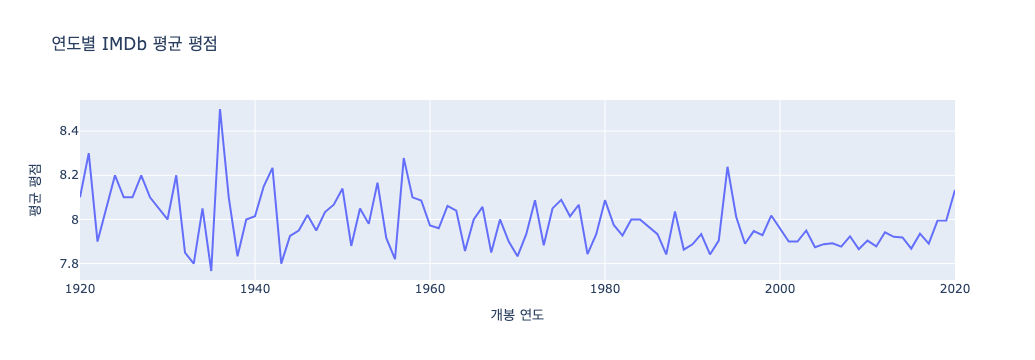

In [6]:
import plotly.express as px
average_rating_per_year = df.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()

fig = px.line(
    average_rating_per_year,
    x='Released_Year',
    y='IMDB_Rating',
    title='연도별 IMDb 평균 평점',
    labels={'Released_Year': '개봉 연도', 'IMDB_Rating': '평균 평점'}
)
fig.show()


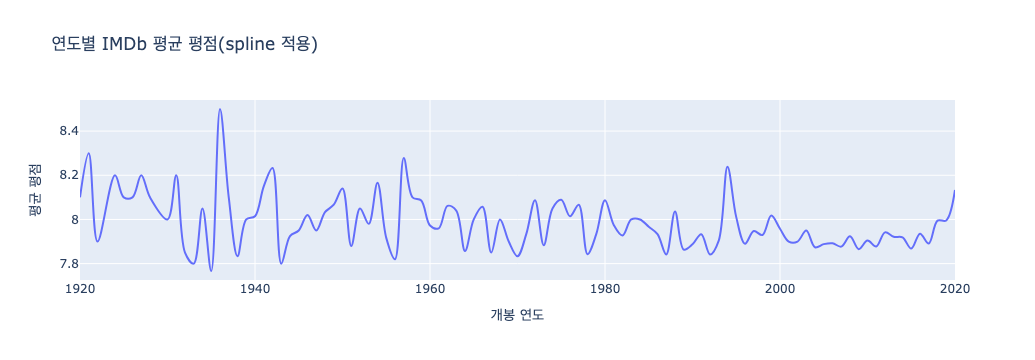

In [7]:
fig = px.line(
    average_rating_per_year,
    x='Released_Year',
    y='IMDB_Rating',
    title='연도별 IMDb 평균 평점(spline 적용)',
    line_shape='spline',
    labels={'Released_Year': '개봉 연도', 'IMDB_Rating': '평균 평점'}
)
fig.show()

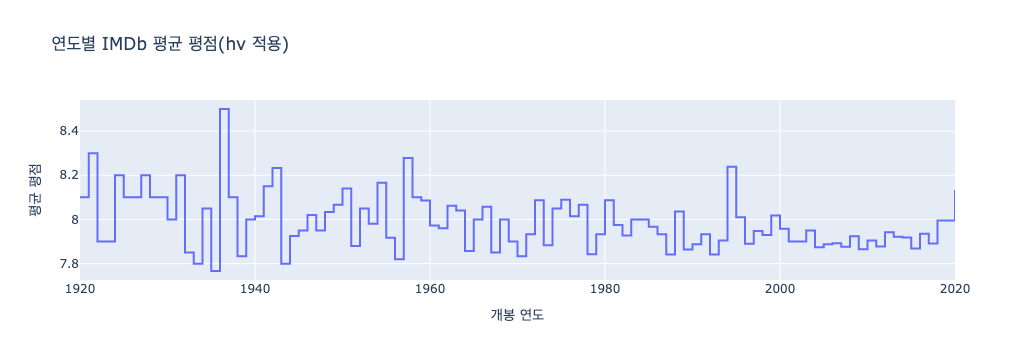

In [8]:
fig = px.line(
    average_rating_per_year,
    x='Released_Year',
    y='IMDB_Rating',
    title='연도별 IMDb 평균 평점(hv 적용)',
    line_shape='hv',
    labels={'Released_Year': '개봉 연도', 'IMDB_Rating': '평균 평점'}
)
fig.show()

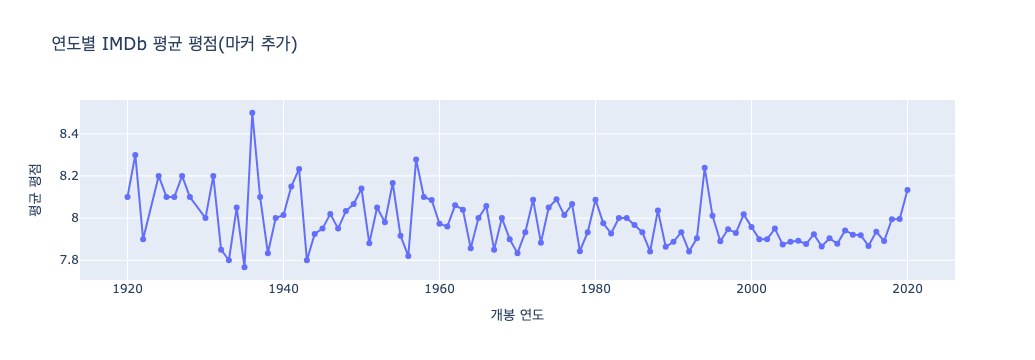

In [9]:
fig = px.line(
    average_rating_per_year,
    x='Released_Year',
    y='IMDB_Rating',
    title='연도별 IMDb 평균 평점(마커 추가)',
    markers=True,
    labels={'Released_Year': '개봉 연도', 'IMDB_Rating': '평균 평점'}
)
fig.show()

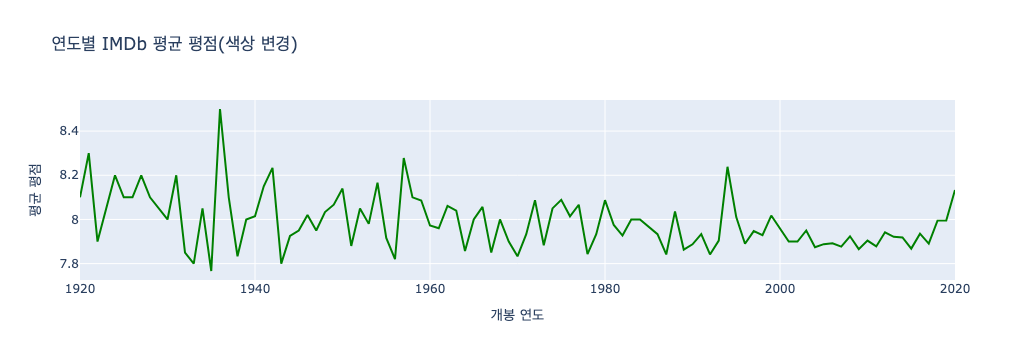

In [10]:
fig = px.line(
    average_rating_per_year,
    x='Released_Year',
    y='IMDB_Rating',
    title='연도별 IMDb 평균 평점(색상 변경)',
    color_discrete_sequence=['green'],
    labels={'Released_Year': '개봉 연도', 'IMDB_Rating': '평균 평점'}
)
fig.show()

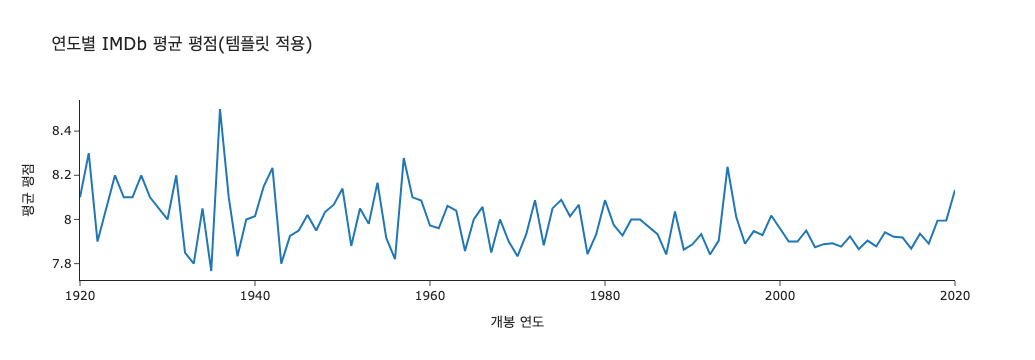

In [11]:
fig = px.line(
    average_rating_per_year,
    x='Released_Year',
    y='IMDB_Rating',
    title='연도별 IMDb 평균 평점(템플릿 적용)',
    template='simple_white',
    labels={'Released_Year': '개봉 연도', 'IMDB_Rating': '평균 평점'}
)
fig.show()

In [12]:
import plotly.express as px
top_genres = df['Genre'].value_counts().nlargest(10).index
df_top_genres = df[df['Genre'].isin(top_genres)]

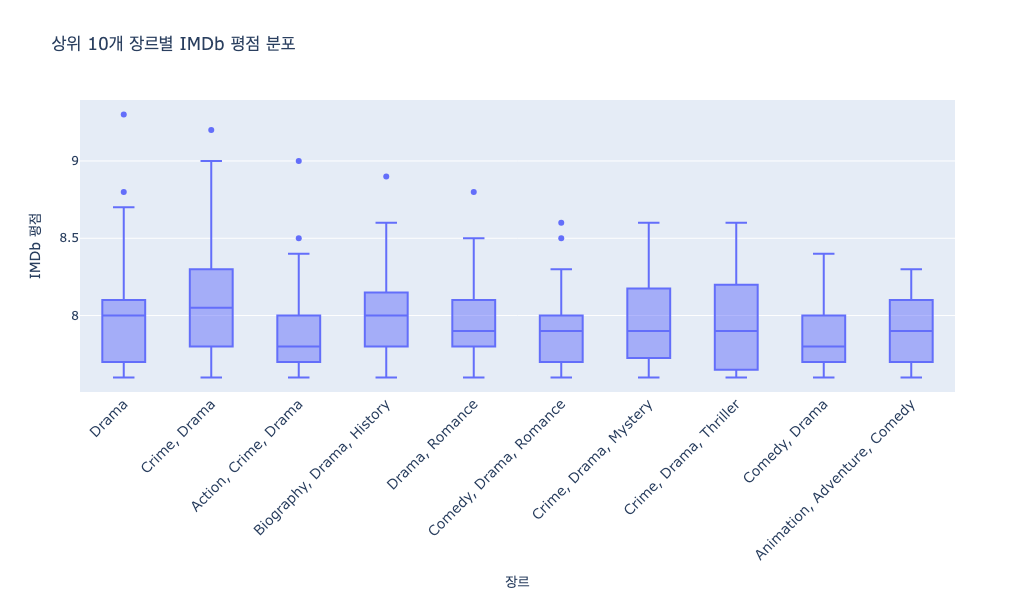

In [13]:
fig = px.box(
    df_top_genres,
    x='Genre',
    y='IMDB_Rating',
    title='상위 10개 장르별 IMDb 평점 분포'
)

fig.update_layout(
    width=900,
    height=600,
    xaxis_title='장르',
    yaxis_title='IMDb 평점',
    xaxis_tickangle=-45,
    xaxis=dict(tickfont=dict(size=14))
)
fig.show()

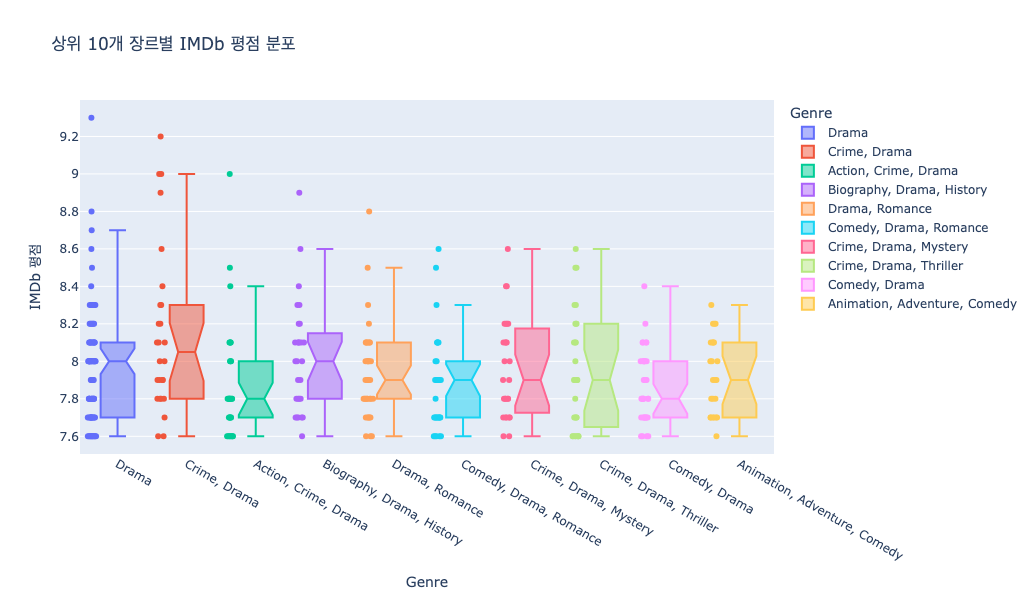

In [14]:
top_genres = df['Genre'].value_counts().nlargest(10).index
df_top_genres = df[df['Genre'].isin(top_genres)]

fig = px.box(
    df_top_genres,
    x='Genre',
    y='IMDB_Rating',
    title='상위 10개 장르별 IMDb 평점 분포',
    height=600,
    color='Genre',
    points='all',
    notched=True
)
fig.update_layout(
    yaxis_title='IMDb 평점',
)
fig.show()

In [15]:
df['Gross'] = df['Gross'].replace({',': ''}, regex=True).astype(float)
correlation_data = df[['IMDB_Rating', 'No_of_Votes', 'Gross', 'Meta_score']].dropna()

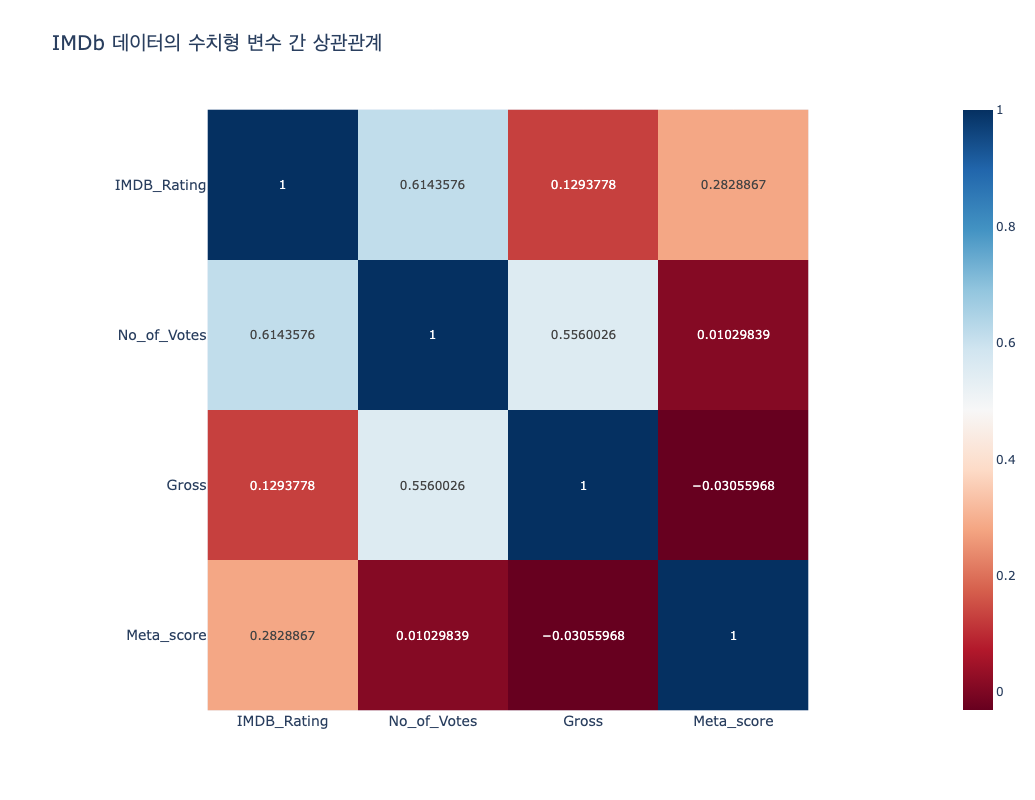

In [16]:
correlation_matrix = correlation_data.corr()

fig = px.imshow(
    correlation_matrix,
    text_auto=True,
    title='IMDb 데이터의 수치형 변수 간 상관관계',
    color_continuous_scale='RdBu')

fig.update_layout(
    width=800,
    height=800,
    title_font_size=20,
    xaxis=dict(tickfont=dict(size=14)),
    yaxis=dict(tickfont=dict(size=14))
)
fig.show()

In [17]:
import pandas as pd
data = {
    'Temperature': [30, 35, 40, 45, 50],
    'Ice_Cream_Sales': [100, 150, 200, 250, 300],
    'Rainfall': [3, 2, 0, 0, 1]
}

df = pd.DataFrame(data)
correlation_maxtrix = df.corr()
print(correlation_matrix)

             IMDB_Rating  No_of_Votes     Gross  Meta_score
IMDB_Rating     1.000000     0.614358  0.129378    0.282887
No_of_Votes     0.614358     1.000000  0.556003    0.010298
Gross           0.129378     0.556003  1.000000   -0.030560
Meta_score      0.282887     0.010298 -0.030560    1.000000
